<h1>3. Limiarização por média móvel</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<p>Função que calcula o limiar global partindo de um limiar estimado e um numero de interações.</p>

In [11]:
def thres_finder(img, thres=20,delta_T=1.0):
    
    #Divide as imagens em duas partes
    x_low, y_low = np.where(img<=thres)
    x_high, y_high = np.where(img>thres)
    
    #Encontra a média das duas partes
    mean_low = np.mean(img[x_low,y_low])
    mean_high = np.mean(img[x_high,y_high])
    
    #Calcula o novo limite
    new_thres = (mean_low + mean_high)/2
    
    #Critérios de parada, caso contrário iterar
    if abs(new_thres-thres)< delta_T:
        return new_thres
    else:
        return thres_finder(img, thres=new_thres,delta_T=1.0)

<p>Função responsável pela limiarização da imagem</p>

In [12]:
def limiarizacao(img, limiar):

    img_saida = np.zeros(img.shape)

    Tmin = np.min(img)
    Tmax = np.max(img)
    
    altura, largura = img_saida.shape    

    for y in range(0, altura):
        for x in range(0, largura):
            if img[y][x] < limiar:
                img_saida[y, x] = Tmin
            else:
                img_saida[y, x] = Tmax

    img_saida = np.uint8(img_saida)

    return img_saida

<p>Função que gera o estograma da imagem</p>

In [13]:
def calcHist(img):
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m

    altura, largura = img.shape

    if img.dtype == 'uint8':
        buffer = np.zeros((256))

    for y in range(0, altura):
        for x in range(0, largura):

            buffer[(img[y, x])] += 1

    return 100*buffer/(altura*largura)

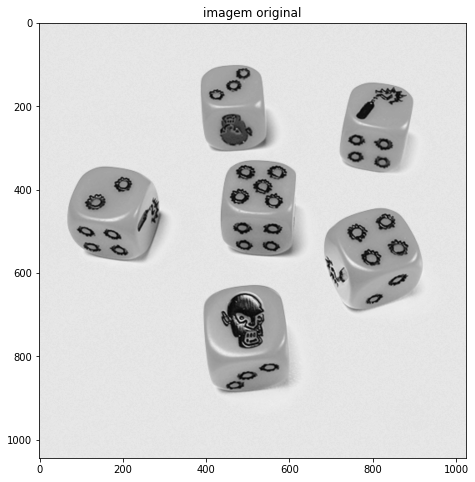

In [14]:
img = cv2.imread('imgs/dados2.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,8))
plt.title('imagem original')
plt.imshow(img, cmap='gray')

<p>Resultado da função thres_finder que encontra o limiar global simples e seu histograma:</p>

threshold = 179.31688356840647


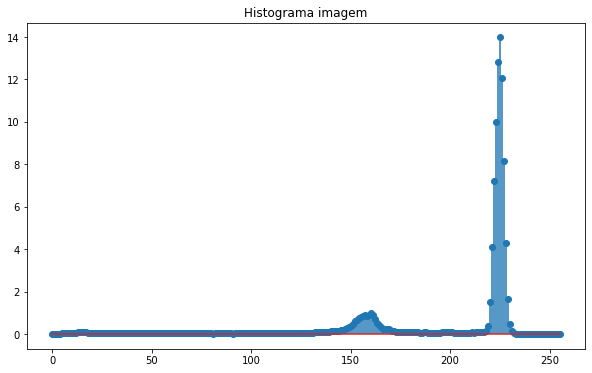

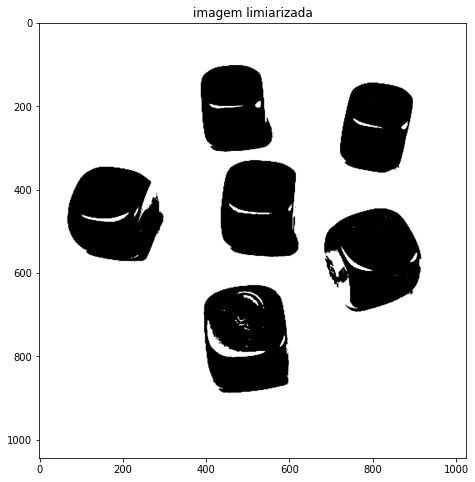

In [22]:
hist = calcHist(img)

thresh = thres_finder(img)
print(f'threshold = {thresh}')

img_seg = limiarizacao(img, thresh)

plt.figure(figsize=(10,6))
plt.stem(hist)
plt.title('Histograma imagem')
plt.show()

plt.figure(figsize=(12,8))
plt.title('imagem limiarizada')
plt.imshow(img_seg, cmap='gray')

<p>Uso da função cv2.adaptiveThreshold com o parametro cv2.ADAPTIVE_THRESH_MEAN_C para gerar a limiarização global da imagem:</p>

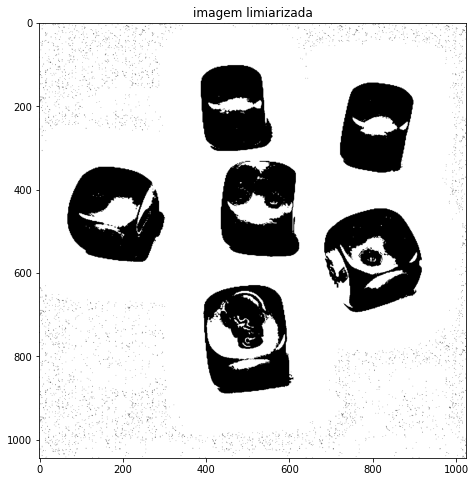

In [16]:
img_seg2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)

plt.figure(figsize=(12,8))
plt.title('imagem limiarizada')
plt.imshow(img_seg2, cmap='gray')